In [1]:
cd ..

/home/astro/phrdhx/automated_exocomet_hunt


In [2]:
from analysis_tools_cython import *

In [3]:
data, lc_info = import_lightcurve("betapic/fits/hlsp_tess-spoc_tess_phot_0000000270577175-s0006_tess_v1_lc.fits")

In [4]:
import lightkurve as lk

In [5]:
data = lk.search_lightcurve("WASP 100")[1].download()

In [6]:
data.time

<Time object: scale='tdb' format='btjd' value=[1325.34474937 1325.36558298 1325.3864166  ... 1353.11589919 1353.13673265
 1353.15756611]>

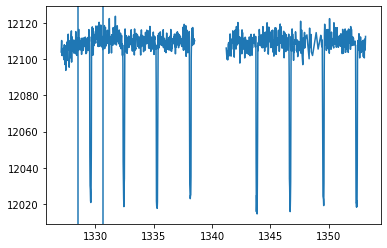

In [7]:
plt.plot(data['time'].value,data['pdcsap_flux'].value)
plt.axvline(data['time'].value[150])
plt.axvline(data['time'].value[250])

---

## Method 1:

In [10]:
time = data['time'][150:250].value
flux = normalise_flux(data['pdcsap_flux'].value)[150:250]

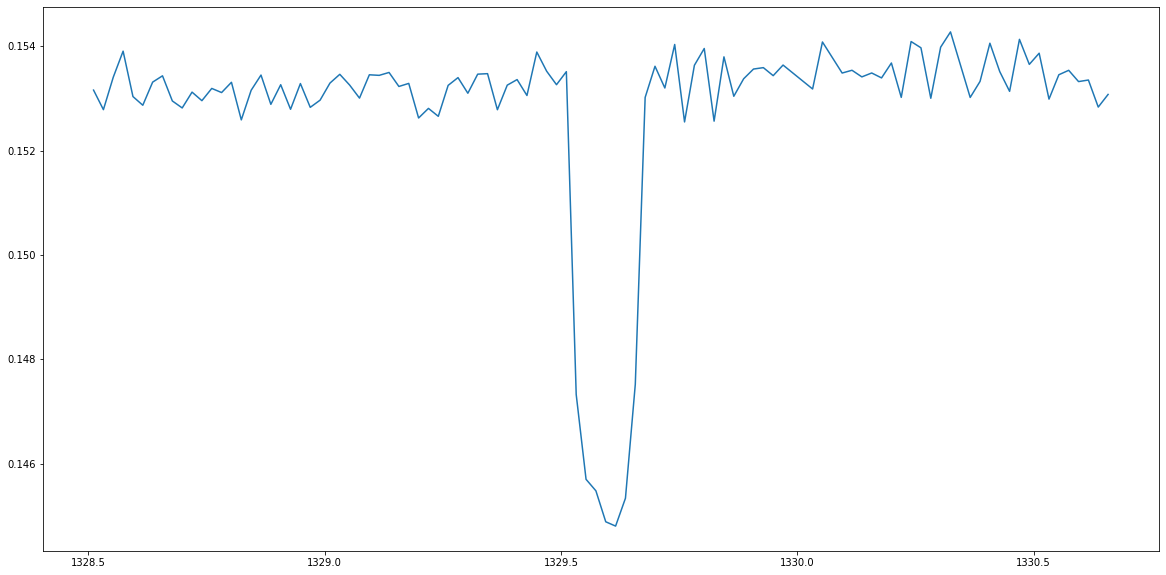

In [11]:
plt.figure(figsize=(20,10))
plt.plot(time,flux)
#plt.plot(time[96],flux.min(),'ro') 
#plt.plot(time[96:96+len(np.flip(flux[0:96].data))],np.flip(flux[0:96].data))

In [12]:
min_flux_ind = np.argmin(flux)

In [13]:
test_mean = np.mean(flux[min_flux_ind-2:min_flux_ind+2])

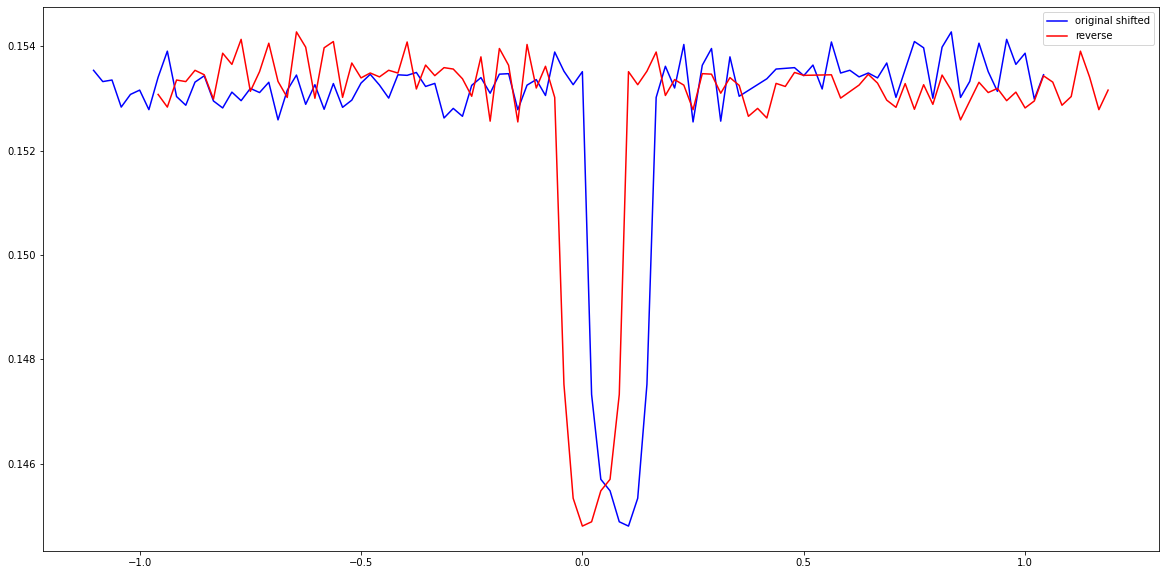

In [14]:
plt.figure(figsize=(20,10))
#plt.plot(time - time[min_flux_ind],flux)


plt.plot(time - time[min_flux_ind],np.roll(flux,5),color='blue',label='original shifted')
#plt.plot(time - time[min_flux_ind],flux,color='black',label='original')
plt.plot(time[::-1]-time[np.argmin(flux[::-1])],flux,color="red",label='reverse')
plt.legend()

In [15]:
x_forward = time - time[min_flux_ind]
y_forward = np.roll(flux,5)

In [16]:
x_backward = (time[::-1]-time[np.argmin(flux[::-1])])[::-1]
y_backward = flux[::-1]

In [17]:
from wotan import flatten

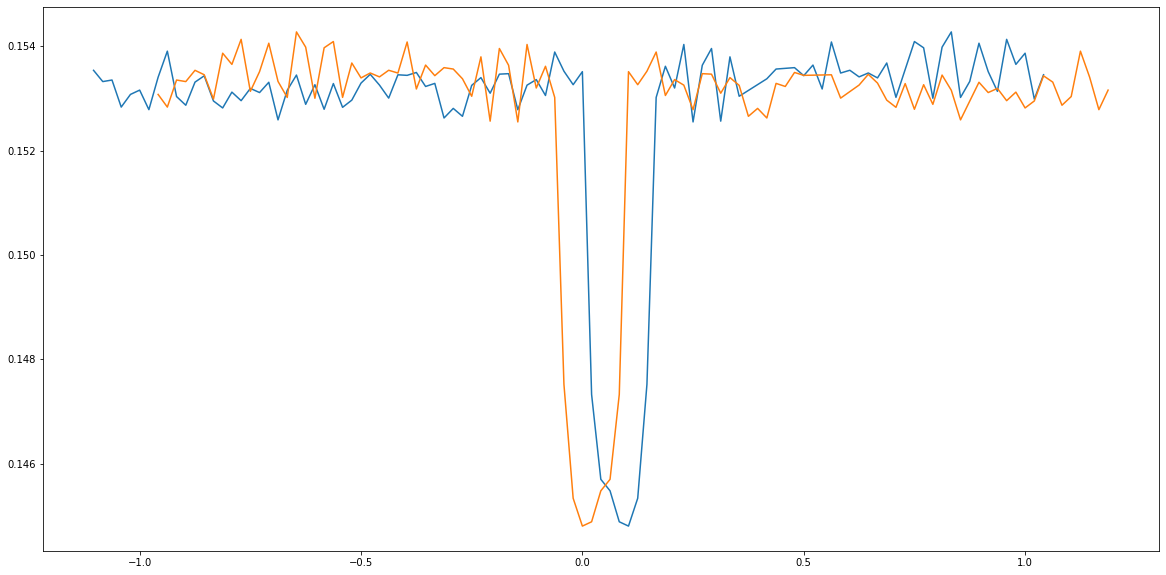

In [18]:
plt.figure(figsize=(20,10))
plt.plot(x_forward,y_forward)
plt.plot(x_backward,y_backward)

In [19]:
t = np.linspace(-2,2,5000)

In [20]:
diff = np.interp(t,x_forward,y_forward) - np.interp(t,x_backward,y_backward)

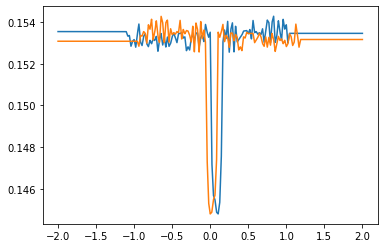

In [21]:
plt.plot(t,np.interp(t,x_forward,y_forward))
plt.plot(t,np.interp(t,x_backward,y_backward))

(0.0, 2.0)

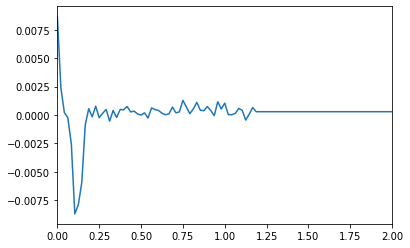

In [22]:
plt.plot(t,diff)
plt.xlim(0,2)

---

## Method 2:

In [112]:
min_ind = np.argmin(flux)

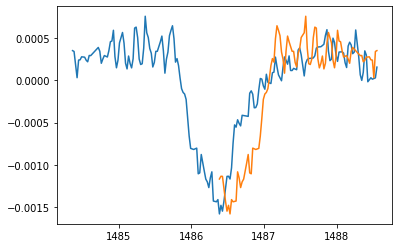

In [123]:
plt.plot(time,flux)
plt.plot(time[min_ind:],np.flip(flux[:min_ind+8]))

---

## Method 3

In [1]:
import lightkurve as lk
from matplotlib import pyplot as  plt
import numpy as np

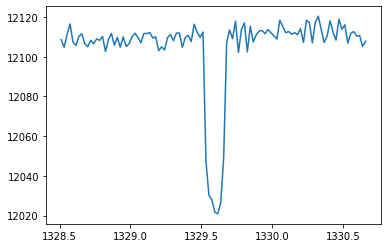

In [2]:
data = lk.search_lightcurve("WASP 100")[1].download()

time = data['time'].value[150:250]

flux = data['pdcsap_flux'].value[150:250]

plt.plot(time,flux)

In [3]:
3*(np.mean(flux) - np.median(flux))/np.nanstd(flux)

-0.7473594148564067

-1.0024651348292943

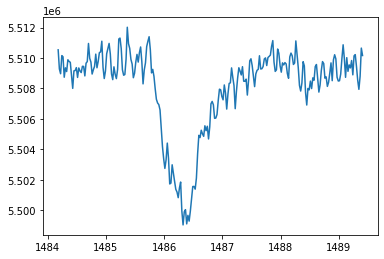

In [4]:
data = lk.search_lightcurve("Beta Pictoris")[12].download()


time = data['time'].value[700:950]
flux = data['flux'].value[700:950]

plt.plot(time,flux)

3*(np.mean(flux) - np.median(flux))/np.nanstd(flux)

---

#### Noiseless lightcurve